### 크레딧 카드 사용 기록

#### 필요한 패키지를 불러온다

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 데이터를 불러와서 살펴 본다

In [2]:
os.chdir(r"..\..\2.Numpy_Matplotlib_Pandas\data")
df = pd.read_csv('data_credit.csv', header='infer',encoding='latin1')

In [3]:
df.shape

(3362796, 8)

In [4]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


#### 데이터를 클리닝하고 결측치 처리를 한다

In [5]:
# 결측치가 분명히 있는 것 같으니 컬럼별 집계해 본다.
nas = df.isnull()
print(nas.sum(axis=0))

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64


In [6]:
# installments 변수의 도수분포를 본다.
df['installments'].value_counts()

3.0     10686
2.0      3431
5.0      1220
6.0       647
10.0      252
4.0       209
12.0      206
24.0       96
8.0        32
7.0        28
9.0        25
18.0       11
20.0        6
36.0        5
22.0        4
15.0        2
Name: installments, dtype: int64

In [7]:
# 일시불이 NA로 처리 되었으니 결측치를 1로 채운다.
df = df.fillna(value=1)
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0


In [8]:
# 다시 installments 변수의 도수분포를 본다.
df['installments'].value_counts()

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

In [9]:
# 일단 date와 time은 사용하지 않겠으니 제거한다
df = df.drop(columns=['date','time'])
df.head(5)

,store_id,card_id,amount,installments,days_of_week,holyday
0,0,d297bba73f,5,1.0,2,0
1,0,d297bba73f,-5,1.0,2,0
2,0,0880849c05,144,1.0,0,0
3,0,8b4f9e0e95,66,1.0,0,0
4,0,7ad237eed0,24,1.0,0,0


#### 개개 변수를 다양한 방법으로 요약하고 시각화 한다

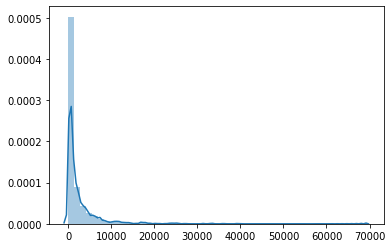

In [10]:
#
# store_id의 도수의 히스토그램.
#
freq1 = df['store_id'].value_counts()
sns.distplot(freq1.values,bins=50)
plt.show()

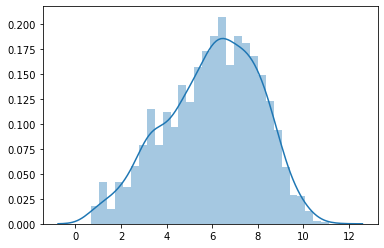

In [11]:
# 큰 skew를 보이므로 log 변환해 본다.
freq1b = np.log(freq1+1)
sns.distplot(freq1b.values,bins=30)
plt.show()

In [12]:
print(np.median(freq1))

492.0


In [13]:
# Top sore id를 본다.
freq1.sort_values(ascending=False)[:10]

0       68773
753     39318
105     36063
1342    33335
428     33285
221     31409
161     27170
1038    25694
323     25221
1366    24946
Name: store_id, dtype: int64

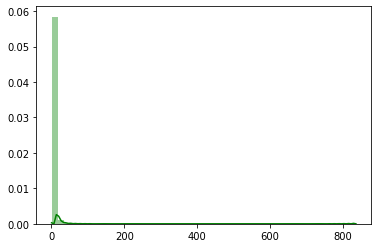

In [14]:
#
# card_id의 도수의 히스토그램.
#
freq2 = df['card_id'].value_counts()
sns.distplot(freq2.values,bins=50,color="green")
plt.show()

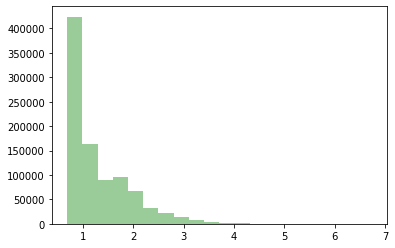

In [15]:
# 큰 skew를 보이므로 log 변환해 본다.
freq2b = np.log(freq2+1)
sns.distplot(freq2b.values,bins=20,color="green",kde=False)
plt.show()

In [16]:
# Top 10 card id를 본다.
freq2.sort_values(ascending=False)[:10]

53817035d4    835
93bba5079c    512
994b71a98a    458
18549044f3    453
6b2d18c5c5    433
10a5c30cda    425
06e61d93b8    423
5cf0b23473    413
0177959e09    409
a9a1e3d97d    405
Name: card_id, dtype: int64

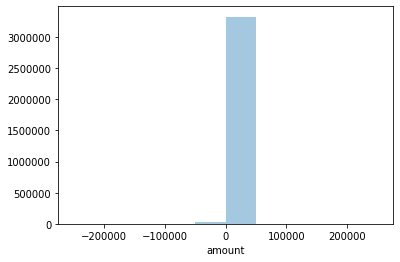

In [17]:
#
# amount의 히스토그램.
# 
sns.distplot(df.amount,bins=10,kde=False)
plt.show()

In [18]:
#
# 실제 구매 or Cancel.
#
ser = df.amount > 0
np.round(ser.mean(),4)             # 실제 구매의 퍼센티지.

0.9896

In [19]:
#
# installments의 막대그림.
# 
freq3 = df['installments'].value_counts()
print("installments의 가짓수 = {}".format((freq3.index).nunique()))

installments의 가짓수 = 17


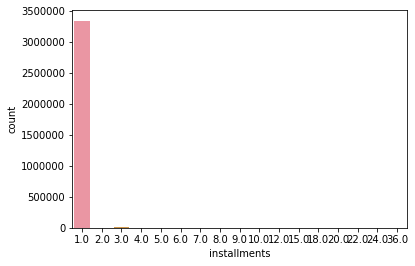

In [20]:
# Seaborn의 countplot이 집계하여 보여준다.
sns.countplot(data=df, x='installments')
plt.show()

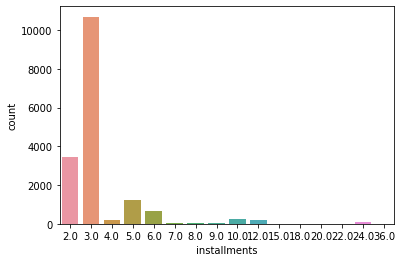

In [21]:
# 1이 너무나 많으니 제거하고 다시 시각화 해본다.
sns.countplot(data=df[df.installments != 1], x='installments')
plt.show()

In [22]:
#
# days_of_week의 횟수 막대그림.
# 
freq4 = df['days_of_week'].value_counts()
print("days of week의 가짓수 = {}".format((freq4.index).nunique()))

days of week의 가짓수 = 7


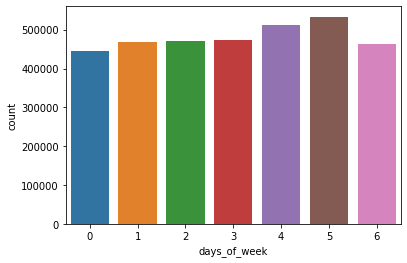

In [23]:
# Seaborn의 countplot이 집계하여 보여준다.
sns.countplot(data=df, x='days_of_week')
plt.show()

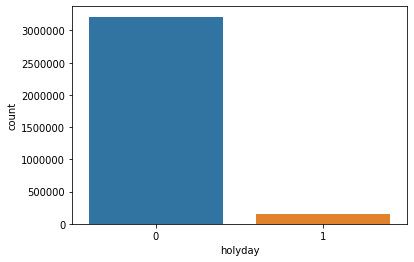

In [24]:
#
# holiday의 막대그림.
# 
sns.countplot(data=df, x='holyday')
plt.show()

#### 일변량 요약과 시각화

In [25]:
# 휴일 여부별 평균 사용 금액.
df.groupby('holyday')['amount'].mean()

holyday
0    146.476094
1    134.881488
Name: amount, dtype: float64

In [26]:
# 요일별 평균 결제 금액.
ser1 = df.groupby('days_of_week')['amount'].mean()
ser1

days_of_week
0    143.199131
1    148.230134
2    149.429079
3    150.447155
4    150.952690
5    146.961930
6    131.532084
Name: amount, dtype: float64

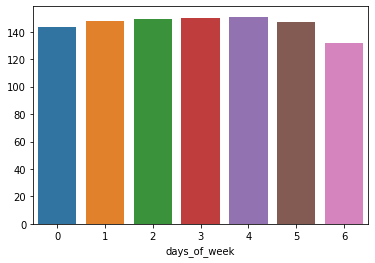

In [27]:
sns.barplot(ser1.index, ser1.values)
plt.show()

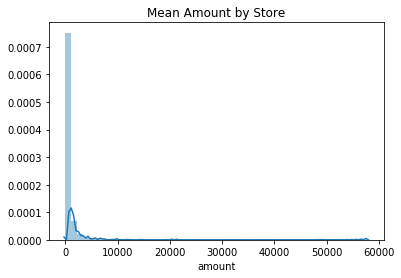

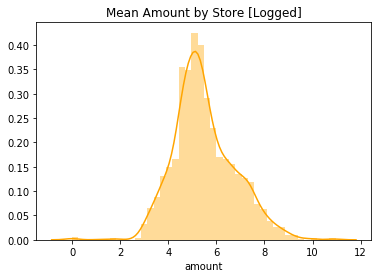

In [28]:
# store_id 별 평균 결제 금액.
ser2 = df.groupby('store_id')['amount'].mean()
sns.distplot(ser2).set_title('Mean Amount by Store')
plt.show()
sns.distplot(np.log(ser2+1),color='orange').set_title('Mean Amount by Store [Logged]')
plt.show()

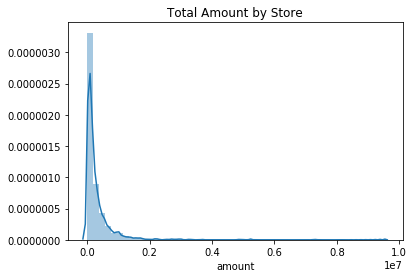

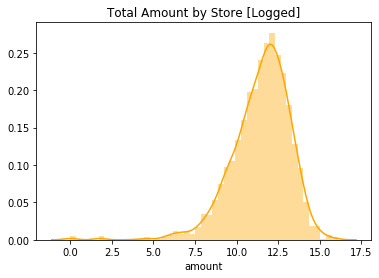

In [29]:
# store_id 별 Total 결제 금액.
ser2b = df.groupby('store_id')['amount'].sum()
sns.distplot(ser2b).set_title('Total Amount by Store')
plt.show()
sns.distplot(np.log(ser2b+1),color='orange').set_title('Total Amount by Store [Logged]')
plt.show()

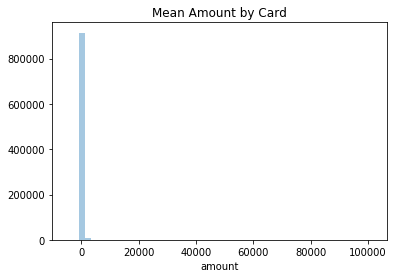

In [30]:
# card_id 별 평균 결제 금액.
ser3 = df.groupby('card_id')['amount'].mean()
sns.distplot(ser3, kde=False).set_title('Mean Amount by Card')
plt.show()

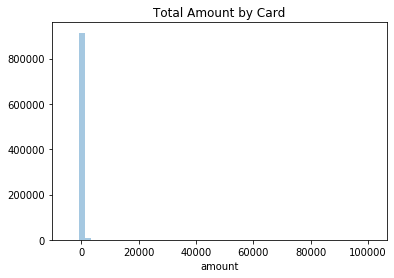

In [31]:
# card_id 별 Total 결제 금액.
ser3b = df.groupby('card_id')['amount'].mean()
sns.distplot(ser3b, kde=False).set_title('Total Amount by Card')
plt.show()

#### 분류

In [32]:
#
# store_id 별 Total 결제 금액에 의한 3 등급 분류.
#
ser2c = pd.qcut(ser2b,3,labels=['Low', 'Medium', 'High'])
combo2 = pd.DataFrame({"amount":ser2b.values, "category":ser2c.values})
combo2.head(5)

,amount,category
0,5234611,High
1,147950,Medium
2,1615060,High
3,62781,Medium
4,270312,High


In [33]:
# 등급별 평균.
combo2.groupby("category")["amount"].mean()

category
Low        23272.582770
Medium    125787.788494
High      680276.184122
Name: amount, dtype: float64

In [34]:
#
# card_id 별 Total 결제 금액에 의한 3 등급 분류.
#
ser3c = pd.qcut(ser3b,3,labels=['Low', 'Medium', 'High'])
combo3 = pd.DataFrame({"amount":ser3b.values, "category":ser3c.values})
combo3.head(5)

,amount,category
0,10.000000,Low
1,55.166667,Low
2,90.000000,Medium
3,80.000000,Medium
4,14.400000,Low


In [35]:
# 등급별 평균.
combo3.groupby("category")["amount"].mean()

category
Low        41.028604
Medium    103.314023
High      364.835640
Name: amount, dtype: float64

#### 이변량 요약과 시각화

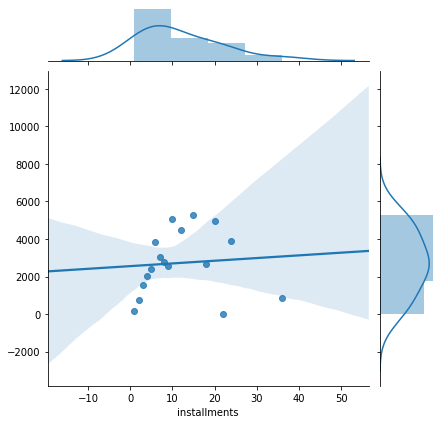

In [36]:
# installment 대 amount
ser = df.groupby('installments')['amount'].mean()
sns.jointplot(ser.index, ser.values, kind='reg')  # installments 로그변환.
plt.show()

In [37]:
# 거래 횟수 대 총 거래 금액
sera = np.log(df['store_id'].value_counts()+1)             # 로그변환.
serb = np.log(df.groupby('store_id')['amount'].sum()+1)    # 로그변환.

In [38]:
df2 = pd.concat([sera,serb],axis=1)
df2.columns = ['Frequency', 'Amount']      # 컬럼 명칭을 바로 쓴다.

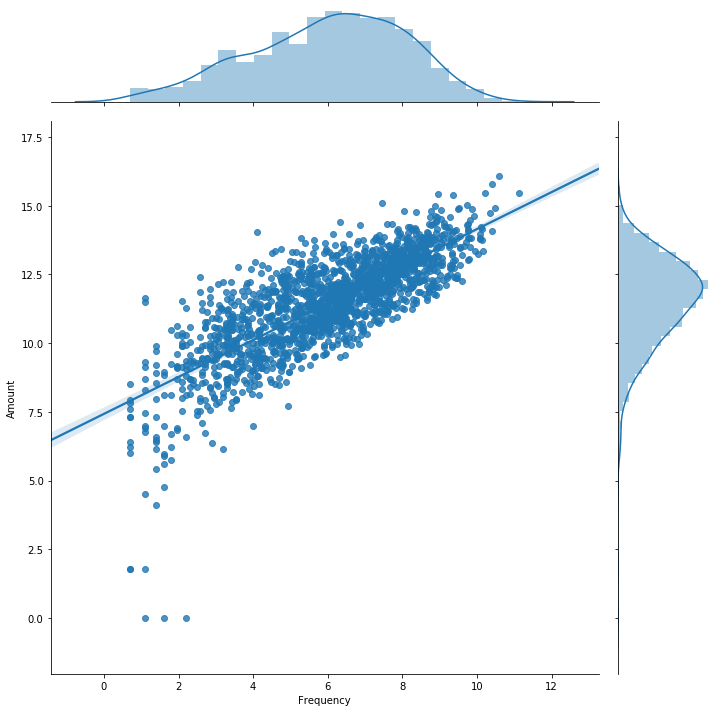

In [39]:
sns.jointplot(x='Frequency',y='Amount',data=df2,kind="reg", size=10)
plt.show()